In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

## Simple function

In [2]:
x = np.linspace(-1, 1, 100)
y = np.arcsin(x)

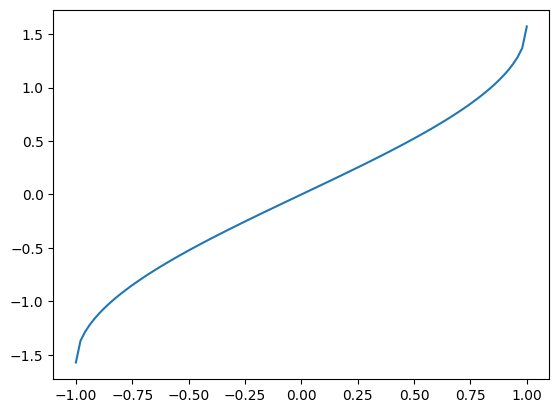

In [3]:
plt.plot(x, y)

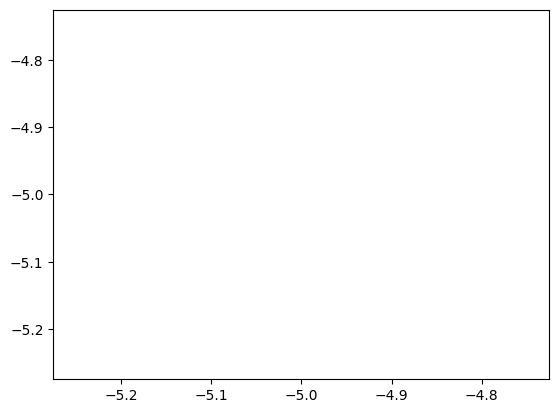

In [4]:
x = -5
y = -5
plt.plot(x, y)

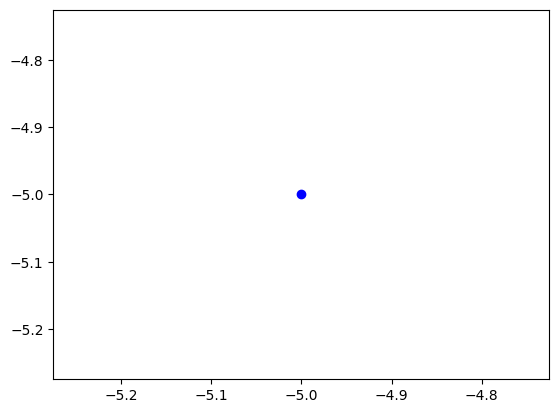

In [5]:
plt.plot(x, y, 'bo')

## Several functions on the chart

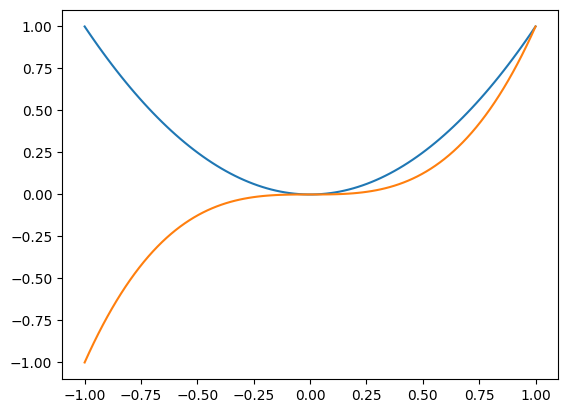

In [6]:
x = np.linspace(-1, 1, 100)
plt.plot(x, x**2, x, x**3)

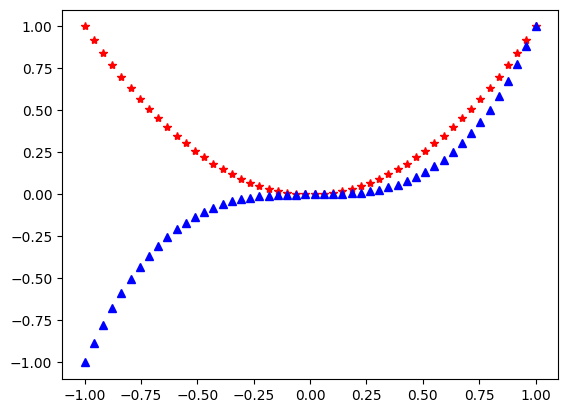

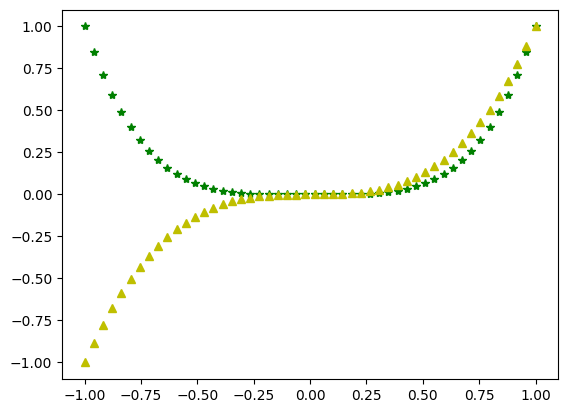

In [7]:
x = np.linspace(-1, 1, 50)
plt.plot(x, x**2, 'r*', x, x**3, 'b^')
plt.show()
plt.plot(x, x**4, 'g*', x, x**3, 'y^')

## Tesla company stocks chart from 2010 to 2017

In [8]:
data = pd.read_csv('Tesla.csv', parse_dates=True, index_col='Date')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


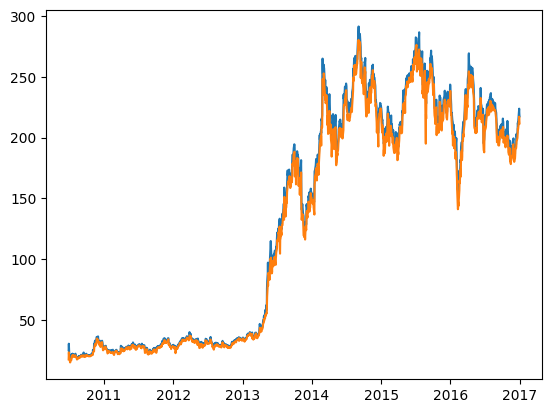

In [9]:
plt.plot(data.index, data['High'])
plt.plot(data.index, data['Low'])

## Exercise

C:\Users\bobrt\AppData\Local\Temp\ipykernel_22396\1238462672.py:2: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, x**(1/2), x, x**(1/4))
C:\Users\bobrt\AppData\Local\Temp\ipykernel_22396\1238462672.py:2: RuntimeWarning: invalid value encountered in power
  plt.plot(x, x**(1/2), x, x**(1/4))


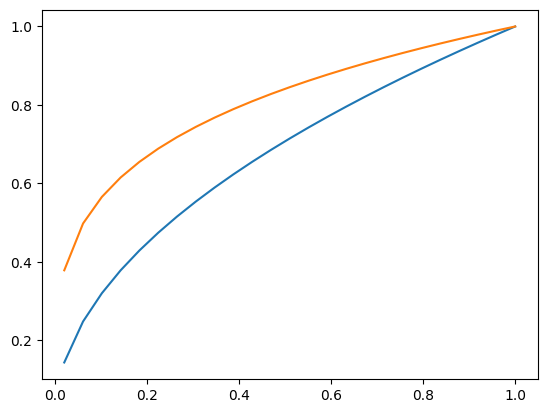

In [10]:
x = np.linspace(-1, 1, 50)
plt.plot(x, x**(1/2), x, x**(1/4))

## Naming the graph and axis.

In [11]:
from pandas.tseries.offsets import MonthEnd
date = data.index[0]
dates = []
while date < data.index[-1]:
    date = date + MonthEnd(1)
    dates.append(date)

In [12]:
first_profit_report_date = pd.Timestamp(day=8, month=5, year=2013)
buy_price = 223

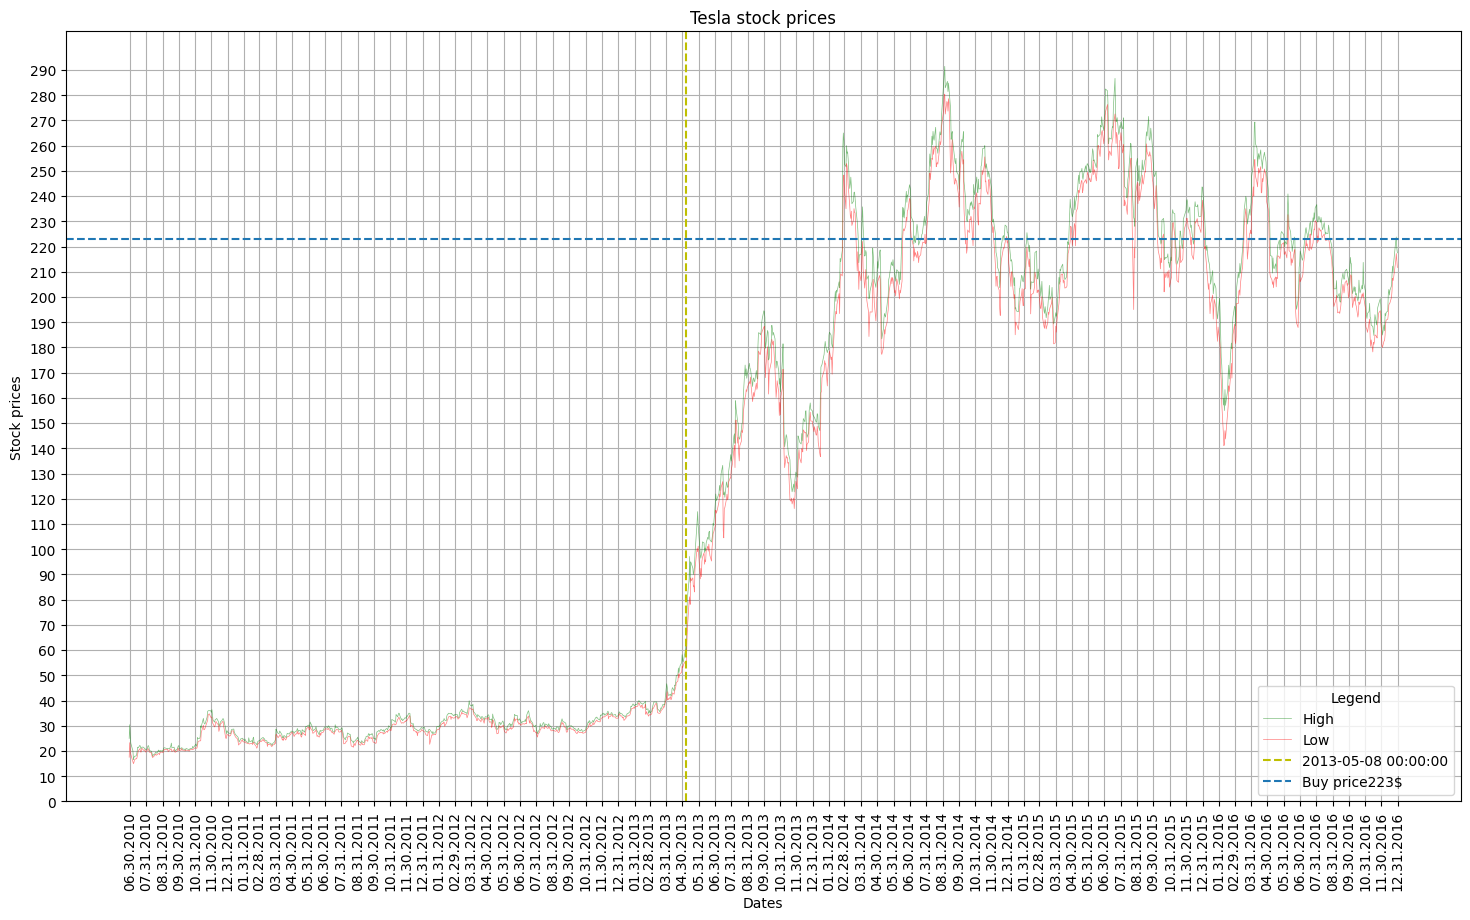

In [13]:
plt.figure(figsize=(18,10))

high_prices_line = plt.plot(data.index, data['High'], label='High', color='g')
low_prices_line = plt.plot(data.index, data['Low'], label='Low', color='r')
plt.setp([high_prices_line, low_prices_line], linewidth=0.5, alpha=0.5)

plt.axvline(x=first_profit_report_date, ls='--', color='y', label=first_profit_report_date)
plt.axhline(y=buy_price, ls='--', label='Buy price{}$'.format(buy_price))

plt.title('Tesla stock prices')
plt.xlabel('Dates')
plt.ylabel('Stock prices')

plt.xticks(dates, labels=[pd.to_datetime(str(date)).strftime('%m.%d.%Y') for date in dates], rotation = 'vertical')
plt.yticks(range(0, 300, 10), labels=range(0, 300, 10))

plt.legend(loc='lower right', title='Legend')
plt.grid()

plt.savefig('TeslaStockPrices.png')
plt.show()

## Exercise

### 1) Leave only 2014 data; 2) Use it to draw a chart; 3) Make a `buy price` at 250 dollars level; 4) Remove magic numbers when creating yticks

In [20]:
startdate = pd.Timestamp(day=1, month=1, year=2014)
enddate = pd.Timestamp(day=31, month=12, year=2014)
datemask = (data.index >= startdate) & (data.index <= enddate)
data2014 = data.loc[datemask]
data2014

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,152.479996,146.550003,149.800003,150.100006,6188400,150.100006
2014-01-03,152.190002,148.600006,150.000000,149.559998,4695000,149.559998
2014-01-06,150.399994,145.240005,150.000000,147.000000,5361100,147.000000
2014-01-07,150.399994,145.250000,147.619995,149.360001,5034100,149.360001
2014-01-08,153.699997,148.759995,148.850006,151.279999,6163200,151.279999
...,...,...,...,...,...,...
2014-12-24,222.500000,219.250000,219.770004,222.259995,1332200,222.259995
2014-12-26,228.500000,221.500000,221.509995,227.820007,3327000,227.820007
2014-12-29,227.910004,224.020004,226.899994,225.710007,2802500,225.710007


In [45]:
date2014 = data2014.index[0]
dates2014 = []
while date2014 < data2014.index[-1]:
    date2014 = date2014 + MonthEnd(1)
    dates2014.append(date2014)

In [53]:
max = int(data2014['High'].max())
min = int(data2014['Low'].min())

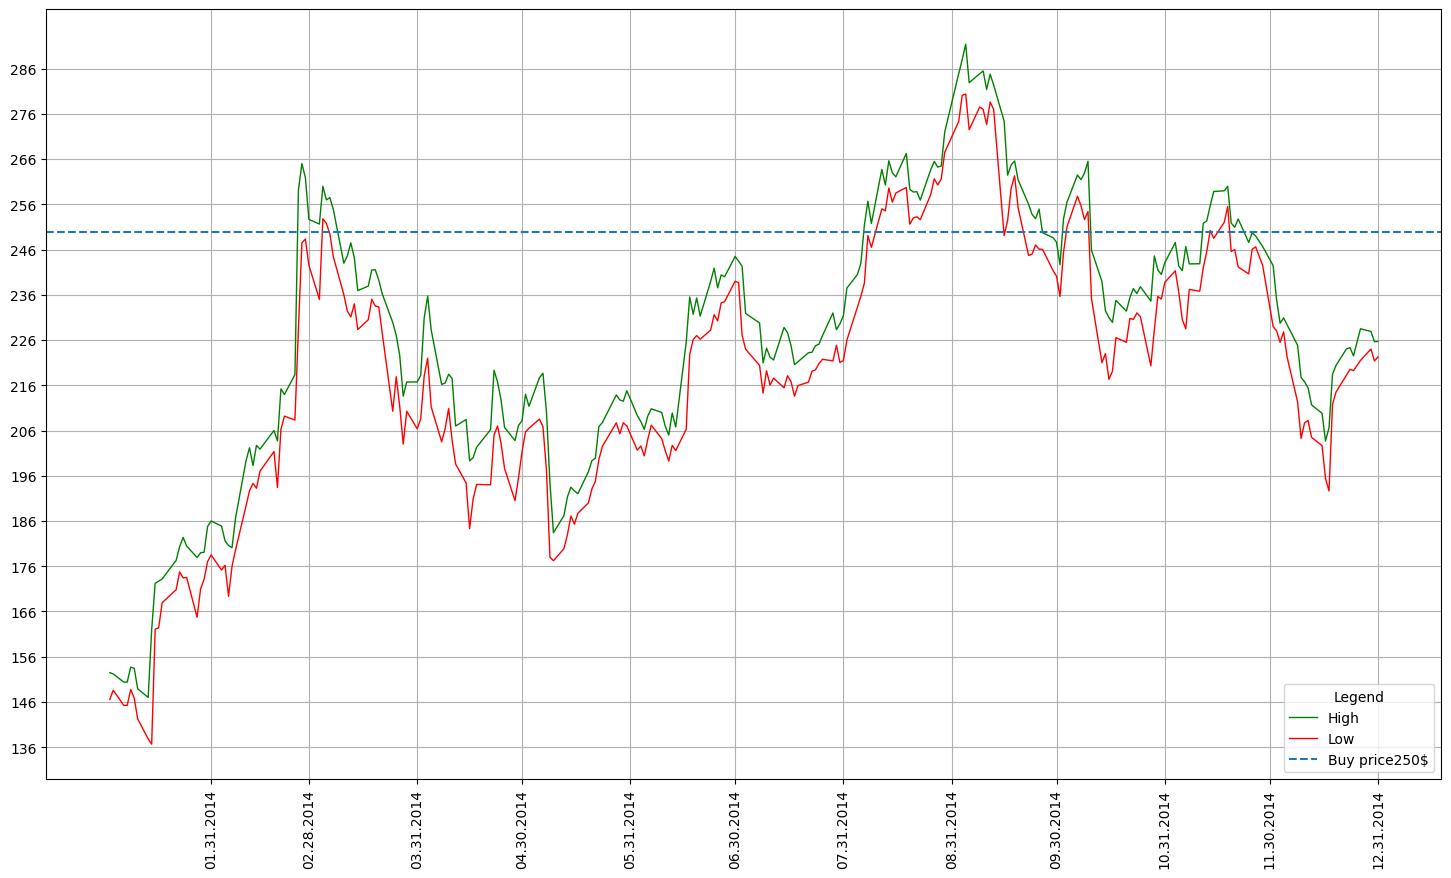

In [57]:
buy_price = 250

plt.figure(figsize=(18,10))

high_prices_line_2014 = plt.plot(data2014.index, data2014['High'], label='High', color='g')
low_prices_line_2014 = plt.plot(data2014.index, data2014['Low'], label='Low', color='r')
plt.setp([high_prices_line_2014, low_prices_line_2014], linewidth=1, alpha=1)

plt.axhline(y=buy_price, ls='--', label='Buy price{}$'.format(buy_price))

plt.xticks(dates2014, labels=[pd.to_datetime(str(date)).strftime('%m.%d.%Y') for date in dates2014], rotation = 'vertical')
plt.yticks(range(min, max, 10), labels=range(min, max, 10))

plt.legend(loc='lower right', title='Legend')
plt.grid()

plt.savefig('TeslaStocks2014')
plt.show()